# Подготовка прототипа модели для металлообрабатывающего предприятия

***Описание проекта:*** 

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

***Описание данных:***

*Технологический процесс*
- `Rougher feed` — исходное сырье
- `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - `Xanthate` **— ксантогенат (промотер, или активатор флотации);
    - `Sulphate` — сульфат (на данном производстве сульфид натрия);
    - `Depressant` — депрессант (силикат натрия).
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

*Параметры этапов*
- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи

***План работы над проектом:***

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель; 
4. Общий вывод.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats as st
from sklearn.metrics import (
    make_scorer, 
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score
)

warnings.filterwarnings("ignore")

In [2]:
def start(dataset):
        dataset.info()
        print('\n',dataset.describe())
        display(dataset.sample(5))
        print('Количество пропусков в таблице:', dataset.isna().sum().sum(), '\n')
        print(dataset.isna().sum(), '\n')
        print('Количество дубликатов в таблице:',  dataset.duplicated().sum())
#         for column in dataset.columns[1:]:
#             data = dataset[[column]]
#             plt.hist(data)
#             plt.title(column)
#             plt.xlabel('Значение')
#             plt.ylabel('Количество')
#             plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
8189,2017-02-14 15:59:59,6.090922,8.231243,14.439805,45.566636,74.908096,13.858677,3.466910,12.094955,3.375787,189.999840,11.977435,7.37,0.696049,11.219062,9.938283,14.450817,29.922068,11.346279,2.387587,7.575325,2.309505,1699.212668,-499.956441,1700.237660,-500.633349,1699.520123,-500.126858,1699.567794,-500.383488,39925.849624,2683.419707,2682.796143,2.838344,12.435112,3.881511,435.595406,48.645954,38.724612,11.017063,14.003112,6.300505,14.000217,6.298125,15.379927,6.893464,32.529844,20.936829,90.445419,7.681845,0.501132,20.815130,2.008569,1499.899105,-300.235001,1200.735765,-500.585207,1198.876942,-500.108021,1099.483709,-501.015873,898.965645,-499.685419,899.128997,-500.700024,17.676620,2.927965,15.092982,2.059662,35.105247,-500.031319,32.034426,-500.345880,41.987199,-399.909634,27.995809,-500.046058,24.978215,-398.600521,23.048314,-399.849010,22.967726,-449.417161,19.998680,-450.138364,24.984842,-499.225500
1531,2016-03-25 12:00:00,5.501266,9.383027,2.156892,46.109824,61.568592,10.190552,1.121581,18.073340,2.828907,78.931819,11.964002,7.93,0.755630,7.

Количество пропусков в таблице: 4481 

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.o

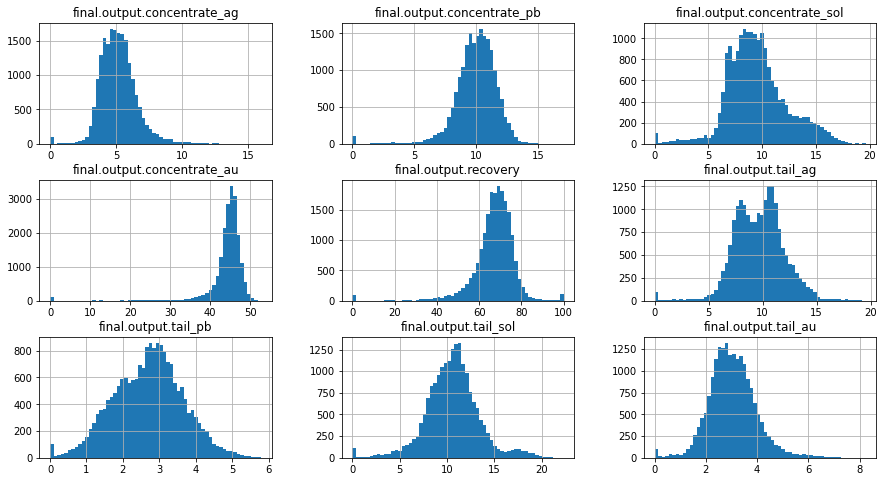

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
start(data_full)

data_full[['final.output.concentrate_ag',
           'final.output.concentrate_pb',
           'final.output.concentrate_sol',
           'final.output.concentrate_au',
           'final.output.recovery',
           'final.output.tail_ag',
           'final.output.tail_pb',
           'final.output.tail_sol',
           'final.output.tail_au']].hist(bins=60, figsize=(15, 8));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
10816,2018-03-06 18:59:59,5.451143,9.192783,8.496943,46.122705,77.394806,12.806549,2.456342,8.859891,2.346803,121.545687,16.016096,6.820000,1.304352,8.765281,9.482078,10.250640,33.806451,22.639018,5.783584,6.901873,2.664317,1701.588431,-500.576574,1681.687600,-498.928070,1700.498753,-499.550507,1555.398793,-499.913029,42940.771237,2475.129109,2475.250295,2.415610,11.015915,3.660133,487.608385,62.453588,38.919669,8.841454,8.014394,6.703352,8.015202,6.705043,14.198803,6.996040,30.322160,20.298673,92.024922,5.638586,0.332545,16.904261,1.176818,1394.653686,-300.198387,1199.221090,-500.405524,1099.353058,-500.491729,1057.983204,-502.709652,1047.825182,-500.762700,998.795000,-501.379575,18.198974,8.795697,1.836522,3.827421,34.969813,-500.329916,24.984227,-500.454079,32.992325,-500.307603,18.992738,-499.856933,23.028837,-500.779695,14.945757,-500.289928,18.011686,-500.699263,12.025788,-500.157629,12.029460,-500.523478
12400,2018-05-23 00:59:59,4.742515,9.102524,7.364804,46.463941,63.239386,9.413876,1.828810,8.967398,2.864405,108.292762,9.041673,6.070000,0.805381,

Количество пропусков в таблице: 4100 

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.o

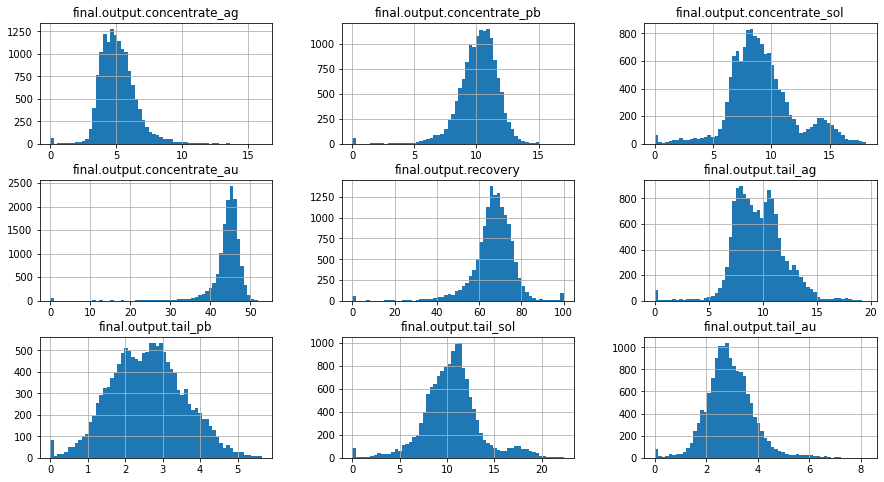

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
start(data_train)

data_train[['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au']].hist(bins=60, figsize=(15, 8));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
979,2016-10-21 21:59:59,143.009663,5.947167,7.20,1.097351,1590.234022,-499.225827,1701.454052,-500.871828,1702.337397,-500.578756,1699.041372,-499.978022,8.939465,3.044378,420.426801,42.006722,34.377623,9.737320,13.992557,6.993692,14.005475,6.999812,1000.319265,-499.878656,1399.713877,-400.339852,1399.727471,-400.816804,1300.205758,-399.870999,1200.270797,-299.728846,1199.770376,-300.581383,31.976893,-500.593072,27.061120,-500.316580,32.989983,-499.296090,31.028543,-500.028999,19.972609,-498.882229,17.031724,-499.854133,16.971764,-498.144619,14.039057,-500.511368,25.011739,-250.505522
4388,2017-11-21 13:59:59,231.236643,11.996592,7.00,1.993941,1598.690253,-499.466800,1599.902181,-496.626960,1651.299796,-499.947546,1649.318503,-499.935554,10.222934,4.999830,510.874439,48.528150,34.817625,10.248122,17.003234,8.199917,16.995268,8.198386,1199.175576,-400.112875,1099.106757,-500.073837,999.202399,-500.198878,899.711899,-499.627299,900.042305,-500.379836,800.173953,-499.729487,21.995471,-500.081259,20.078503,-500.231175,29.958266,-499.937164,22.043829,-499.889204,16.981255,-500.479916,14.920816,-499.346920,10.973411,-500.270997,9.075999,-499.814218,15.993155,-500.161926
2034,2016-12-06 13:59:59,242.191085,7.981886,7.51,1.279921,1502.310023,-499.282192,1500.503466,-499.758031,1498.492449,-496.958656,1499.838608,-500.459165,10.918386,4.076380,375.743805,42.849429,34.745174,10.472808,10.996595,5.827073,11.000203,5.780484,998.453294,-500.351506,1451.106702,-500.020507,1450.085071,-499.948242,1459.268801,-502.166275,1100.522243,-499.221888,1000.974369,-500.040101,27.124517,-500.070665,23.046059,-499.929778,30.029777,-499.884289,26.981381,-499.999133,17.977814,-501.099373,16.006245,-500.657350,16.228607,-500.132919,11.995270,-500.170127,20.993588,-500.183383
1937,2016-12-02 12:59:59,262.061026,9.079297,7.55,1.262069,1502.455073,-499.199248,1501.047201,-499.044313,1502.103582,-497.067782,1500.737350,-500.820245,10.865371,4.345261,492.849814,46.825126,36.639943,10.397716,14.502181,6.700048,14.507616,6.699066,1005.116408,-499.740016,1451.995725,-500.161493,1454.859082,-500.786771,1409.202607,-495.66

Количество пропусков в таблице: 90 

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfat

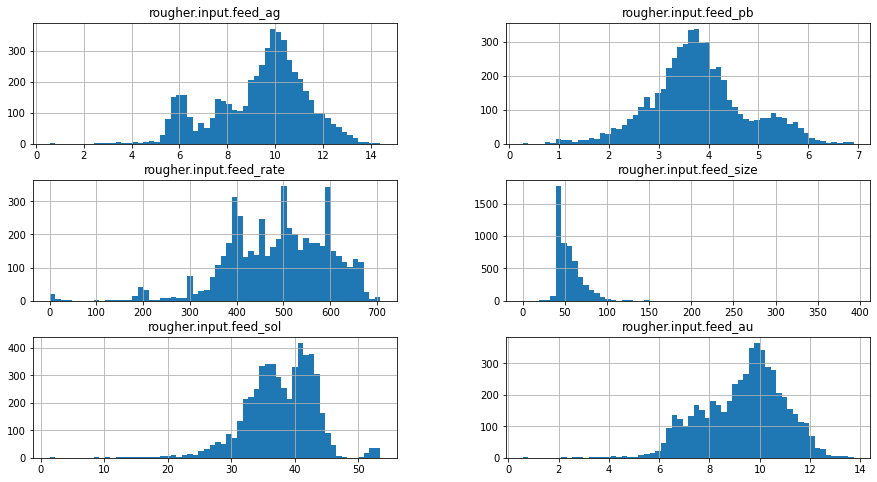

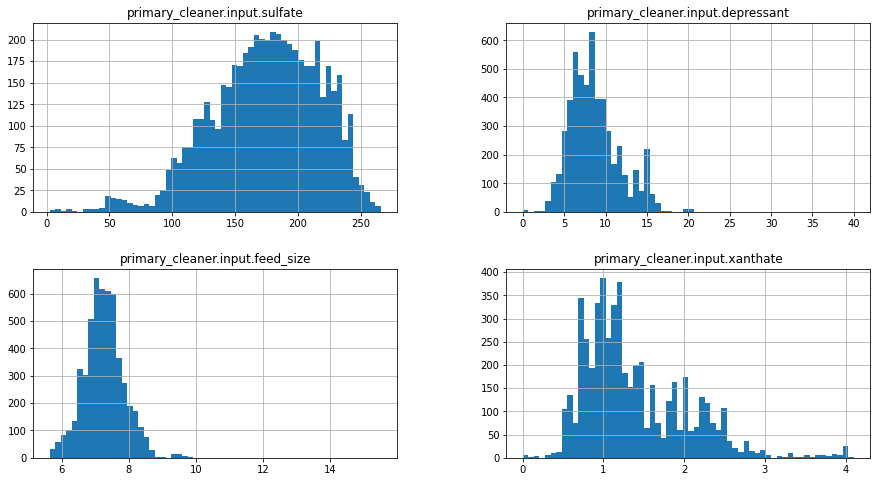

In [5]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
start(data_test)

data_test[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au']].hist(bins=60, figsize=(15, 8));

data_test[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 
       'primary_cleaner.input.xanthate', ]].hist(bins=60, figsize=(15, 8));

Вычислим самостоятельно эффективность обогащения (`rougher.output.recovery`) и сравним с имещимися в таблице данными.

In [6]:
recovery = (
    (data_train['rougher.output.concentrate_au'] *
        (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])) /
        (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - 
                                                data_train['rougher.output.tail_au']))) * 100
mean_absolute_error(data_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Сделав рассчёты и сравнив их посредсвом метрики `MAE`, мы убедились в том, что данные в таблице указаны `верно`.

Обратимся к данным в таблице `gold_recovery_test_new.csv` - это наша тестовая выборка.

In [7]:
print(data_test.info(), len(data_test.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Выведем список отсутсвующийх столбцов в тестовой выборке.

In [8]:
for value in data_full.columns:
    if value not in data_test.columns:
        print(value)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В датасете `53` столбца, в то же время в исходном наборе данных их `87`. ***Здесь же нам доступны параметры:***
- дата
- входные параметры по реагентам этапа `rougher` (флотация), а так же начальные параметры содержания руды (Au, Ag, Pb), размем гранул и скорость подачи
- входные параметры по реагентам этапа `primary_cleaner` (первичной очистки) и размер гранул
- параметры этапа `secondary_cleaner` (вторичной очистки)

***У нас нет в наборе данных:***
- по концентратам добываемых веществ, включая финалный этап
- нет даным по "хвостам"
- нет данных эффективности (`rougher.output.recovery`)
- нет рассчётных характеристик об отношении реагентов к коныентрату добываемых веществ

Проведём предодготовку данных. Пропуски заменим на медианые значения. Признаком для группировки будет значение даты (`год, месяц, день`).

In [9]:
# распарсим дату по одноименным столбцам
data_test['year'] = pd.DatetimeIndex(data_test['date']).year 
data_test['month'] = pd.DatetimeIndex(data_test['date']).month 
data_test['day'] = pd.DatetimeIndex(data_test['date']).day

In [10]:
# в цикле произведём замену в каждом солбце на медианное значение
columns = data_test.columns

for v_column in columns[1:]:
    data_test[v_column] = data_test[v_column].fillna(
    data_test.groupby(['year', 'month', 'day'])[v_column].transform('median'))

In [11]:
data_test.isna().sum().sum()

0

In [12]:
# удалим впомогательные столбцы    
data_test = data_test.drop(['year', 'month', 'day'], axis=1)

Замена пустых значений прошла успешно. Заполним пропуски на обучающей выборке. На текущий момент это `4100` значений.

In [13]:
data_train['year'] = pd.DatetimeIndex(data_train['date']).year 
data_train['month'] = pd.DatetimeIndex(data_train['date']).month 
data_train['day'] = pd.DatetimeIndex(data_train['date']).day

In [14]:
# в цикле произведём замену в каждом солбце на медианное значение
columns = data_train.columns

for v_column in columns[1:]:
    data_train[v_column] = data_train[v_column].fillna(
    data_train.groupby(['year', 'month', 'day'])[v_column].transform('median'))

In [15]:
data_train.isna().sum().sum()

1340

Заполнили пропуски, но только большую часть. Посмотрим внимательнои у видим, что нет данных за весь день. И так везде где не сработала логика по замене.

In [16]:
display(data_train.loc[1160:1170])

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day
1160,2016-03-07 07:00:00,4.370463,10.457113,3.532258,43.783991,65.288248,10.274978,1.019737,17.854444,1.661236,135.005423,12.036575,7.30,1.705716,9.016555,5.028599,5.422458,33.063366,10.533129,1.557132,13.588001,1.449604,1800.948529,-350.177904,1800.242394,-349.810009,1801.900009,-349.187269,797.819696,-349.674346,64540.730062,3297.297418,3298.993387,3.295661,6.825067,1.355425,550.130074,58.961799,28.034374,4.467022,8.285885,7.002356,8.272687,7.000870,10.091559,7.327529,15.836602,14.626123,87.052393,4.309541,0.440290,22.115755,0.787834,999.981043,-499.675907,1649.488362,-349.876387,1549.967411,-399.353823,1549.966842,-399.965157,1449.874705,-400.253540,1450.044479,-400.295255,0.000000,0.000000,0.000000,0.000000,3.671324,-799.359373,0.043202,-788.801003,27.989506,-399.250010,25.990702,-398.775328,13.985731,-399.790084,13.946505,-400.445292,12.014007,-399.812676,10.010725,-399.982614,19.928276,-400.611849,2016,3,7
1161,2016-03-07 08:00:00,4.978376,10.380017,3.532258,43.121872,15.887114,10.137380,0.870445,17.765880,1.785682,130.026197,11.661264

В таком случае заменим медианным значением, но сортировка будет не по дню, а `по месяцу`.

In [17]:
# в цикле произведём замену в каждом солбце на медианное значение
columns = data_train.columns

for v_column in columns[1:]:
    data_train[v_column] = data_train[v_column].fillna(
    data_train.groupby(['year', 'month'])[v_column].transform('median'))

In [18]:
data_train.isna().sum().sum()

0

Вот теперь мы полностью избавились от пропусков.

***Вывод:*** У нас 3 набора данных. Один полный и две выборки - обучающая и тестовая.

Исследовав тестовую выборку мы обнаржили, что в датасете `53` столбца, в то же время в исходном наборе данных их `87`. ***Нам доступны параметры:***
- дата
- входные параметры по реагентам этапа `rougher` (флотация), а так же начальные параметры содержания руды (Au, Ag, Pb), размем гранул и скорость подачи
- входные параметры по реагентам этапа `primary_cleaner` (первичной очистки) и размер гранул
- параметры этапа `secondary_cleaner` (вторичной очистки)

***У нас нет в наборе данных:***
- по концентратам добываемых веществ, включая финалный этап
- нет даным по "хвостам"
- нет данных эффективности (`rougher.output.recovery`)
- нет рассчётных характеристик об отношении реагентов к коныентрату добываемых веществ

Так же мы вычислили самостоятельно эффективность обогащения (rougher.output.recovery) и сравнили с имеющимися в таблице данными. Посредсвом метрики `MAE`, мы убедились в том, что данные в таблице указаны `верно`. Так же в этапе подготовки данных мы заполнили пропуски в тестовой и обучающей выборке. Пропуски заменили медианым значением. Признаком для группировки обозначили значения даты (`год, месяц, день`).

## Анализ данных

Теперь посмотрим как меняется концентрация металлов на различных этапах очистки.

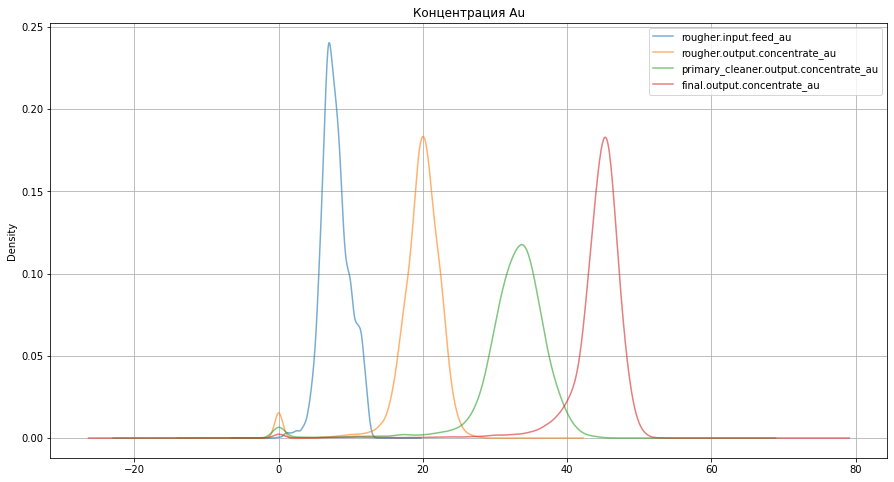

In [19]:
data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]\
.plot(kind='kde',\
      title='Концентрация Au',\
      grid=True,\
      alpha=0.6,\
      figsize=(15,8)
);

Для начала золото. Базовое значение около `6`. Концентрация металла после флотации резво возрастает к `20`. Постепенно качество концентрата увеличивается. И на выходе мы имеем концентрат золота со значение `45`. Это хороший результат, чуть более чем `в 2 раза больше` начального.

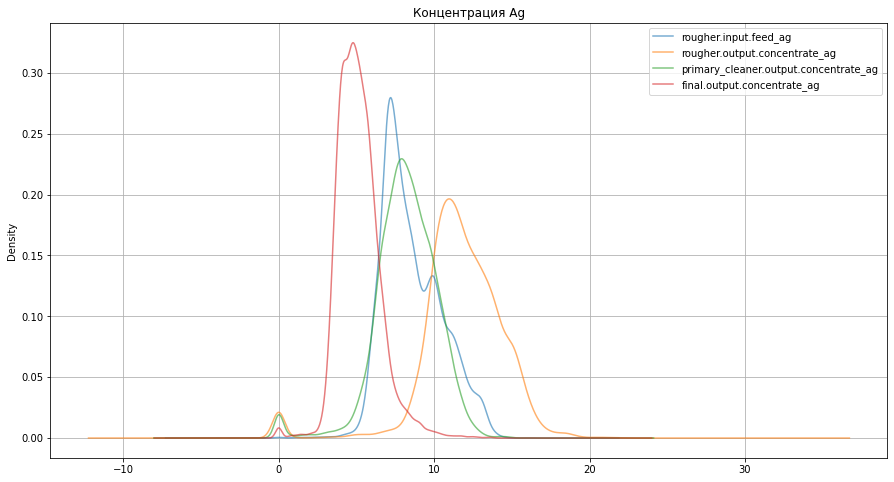

In [20]:
data_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]\
.plot(kind='kde',\
      title='Концентрация Ag',\
      grid=True,\
      alpha=0.6,\
      figsize=(15,8)
);

С серебром ситуация сложнее. Начальное значение в районе `8`. После первого этапа концентрация метала находится в районе `11` единиц. Но постепенно в процессе выделения золота, теряются элементы серебра. Итого на выходе у нас остаётся концентрат серебра с `5` единицами.

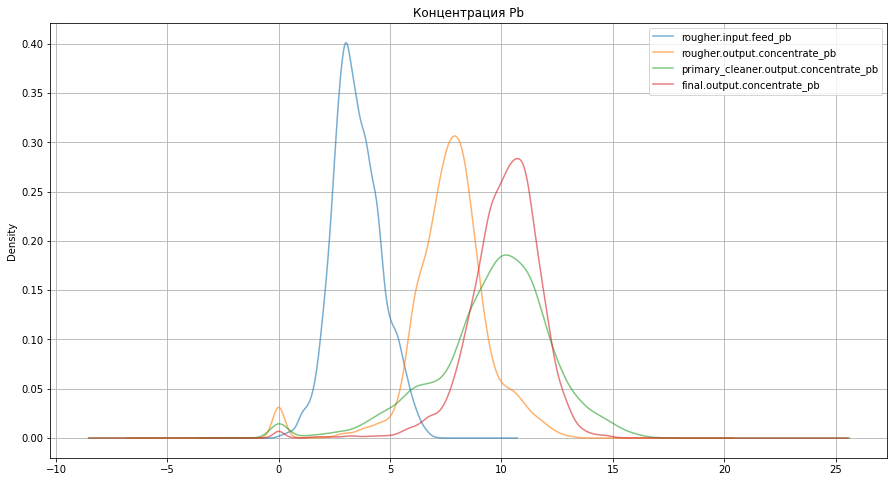

In [21]:
data_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]\
.plot(kind='kde',\
      title='Концентрация Pb',\
      grid=True,\
      alpha=0.6,\
      figsize=(15,8)
);

И последний элемент свинец. В сырье его концентрация около `3` едениц. После начальной стадии имеет концентрат `7` единиц в пиковом значении и в процессе становится чуть более лучше, а именно `11` единиц.

Теперь сравним размеры гранулов сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для этого составим нулевую гипотезу.

In [22]:
# H_0: Распределения размеров гранул сырья на обучающей и тестовой выборках равны.
# H_1: Распределения размеров гранул сырья на обучающей и тестовой выборках не равны.

alpha = 0.05

results = st.ttest_ind(
    data_train['rougher.input.feed_size'], 
    data_test['rougher.input.feed_size'], equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

7.170724284346664e-38
Отвергаем нулевую гипотезу


Мы отвергли нулевую теорию. Оценка конечной модели будет не точной, но посмотрим на сколько они различны на графике.

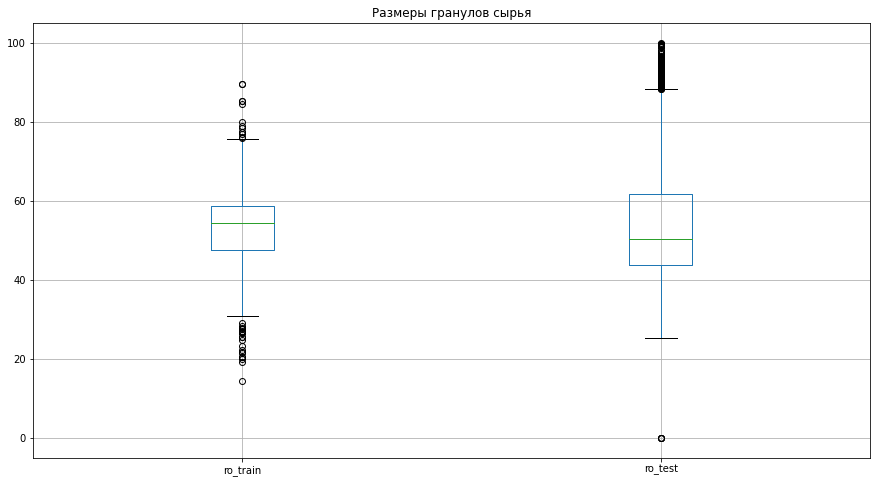

In [23]:
# построим график, чтобы посмотреть на сколько разное распределение
data = {'ro_train' : data_train['rougher.input.feed_size'],
        'ro_test' : data_test['rougher.input.feed_size']}
data_frame_size = pd.DataFrame(data, columns = ['ro_train', 'ro_test'])

data_frame_size.query('ro_train < 100 and ro_test < 100').plot(kind='box',\
      title='Размеры гранулов сырья',\
      grid=True,\
      figsize=(15,8)
);

А вот график показывает нам, что распределение размеров достаточно похожи, чтобы не сильно искажать предсказания модели.

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого создадим доплнительные столбцы где сложим все значения по категории.

In [24]:
data_train['rougher.input.feed_sum'] = (
    data_train['rougher.input.feed_ag'] + 
    data_train['rougher.input.feed_pb'] + 
    data_train['rougher.input.feed_au'] +
    data_train['rougher.input.feed_sol']
)

data_train['rougher.output_sum'] = (
    data_train['rougher.output.concentrate_ag'] + 
    data_train['rougher.output.concentrate_pb'] + 
    data_train['rougher.output.concentrate_au'] +
    data_train['rougher.output.concentrate_sol']
)

data_train['primary_cleaner_sum'] = (
    data_train['primary_cleaner.output.concentrate_ag'] + 
    data_train['primary_cleaner.output.concentrate_pb'] + 
    data_train['primary_cleaner.output.concentrate_au'] +
    data_train['primary_cleaner.output.concentrate_sol']
)

data_train['final_sum'] = (
    data_train['final.output.concentrate_ag'] + 
    data_train['final.output.concentrate_au'] + 
    data_train['final.output.concentrate_pb'] +
    data_train['final.output.concentrate_sol']
)
data_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,rougher.input.feed_sum,rougher.output_sum,primary_cleaner_sum,final_sum
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2016,1,15,51.680034,66.424950,72.640924,63.644396
1,2016-01-15 01:0

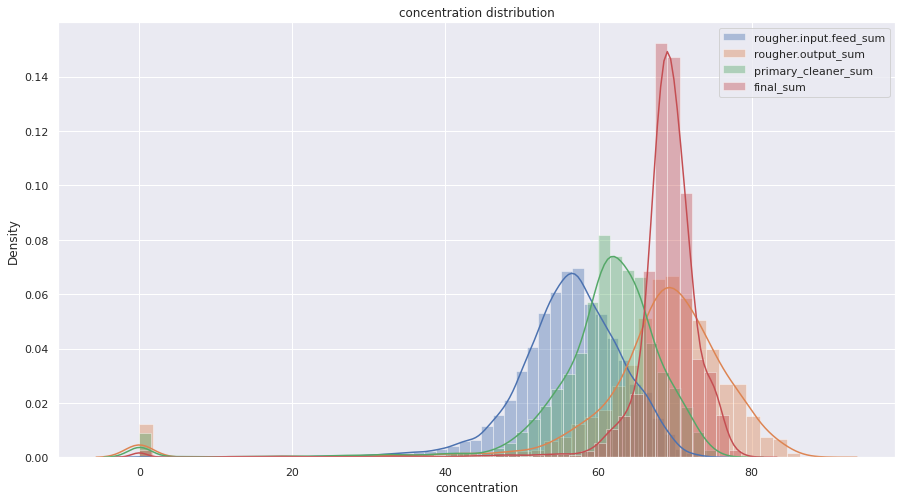

In [25]:
sns.set(rc={'figure.figsize':(15,8)})

for i in data_train[['rougher.input.feed_sum', 'rougher.output_sum', 'primary_cleaner_sum', 'final_sum']]:
    sns.distplot(data_train[i], label=i)
plt.legend();
plt.title('concentration distribution');
plt.xlabel('concentration');

Мы построили график на основе наших "суммарных" столбцов. И видим, что самая большая концентрация на финальной стадии. Что мы и предполагали. В обучающей выборке есть значительное количесво нулевых значений. Нам нужно убрать эти сроки из таблицы, чтобы они не мешали правильно обучиться модели.

In [26]:
len(data_train)

14149

In [27]:
for col in ['rougher.input.feed_sum', 'rougher.output_sum', 'primary_cleaner_sum', 'final_sum']:
    data_train = data_train[data_train[col] > 0]

In [28]:
len(data_train)

13725

***Вывод:*** Мы рассмотрели как меняется концентрация металлов на различных этапах очистки. И выявили что:
1. Для начала золото. Базовое значение около `6`. Концентрация металла после флотации резво возрастает к `20`. Постепенно качество концентрата увеличивается. И на выходе мы имеем концентрат золота со значение `45`. Это хороший результат. Во много раз больше начального.
2. С серебром ситуация сложнее. Начальное значение в районе `8`. После первого этапа концентрация метала находится в районе `11` единиц. Но постепенно в процессе выделения золота, теряются элементы серебра. Итого на выходе у нас остаётся концентрат серебра с `5` единицами.
3. И последний элемент свинец. В сырье его концентрация около `3` едениц. После начальной стадии имеет концентрат `7` единиц в пиковом значении и в процессе становится чуть более лучше, а именно `11` единиц.


Так же мы сравнили распределение размеров гранул сырья на обучающей и тестовой выборках. Распределения отличаются друг от друга, но по графику можем наблюдать, что отличие хоть и есть, но оно не очень большое. Не особо повлияет на качество предсказаний модели.

Что касается суммарной концентрации всех веществ на разных стадиях то мы суммировали значения концентраций и построили график, по которому увидели, что есть значения равное 0. Мы решили удалить эти сроки (их было около 1000), чтобы они не мешали обучению модели.

## Модель

Для начала напишем функцию, которая поможет нам вычислимь итоговой sMAPE. 

In [29]:
def smape(target, predict):
    return 1 / len(target) * sum((abs(target - predict) / ((abs(target) + abs(predict)) / 2) * 100))

def total_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape

# скорер для оценки модели
smape_score = make_scorer(smape, greater_is_better=False)

Функция написана. Обучим разные модели и оценим их качество кросс-валидацией. Для этого определимся с целевым признаком и обучающими признаками.

In [30]:
# у нас будет 2 целевых признака
target_train_rougher = data_train['rougher.output.recovery'] # эффективность обогащения чернового концентрата
target_train_final = data_train['final.output.recovery'] # эффективность обогащения финального концентрата

# возьмём в обучающую только те признаки, что есть в тестовой выборке
test_columns = data_test.columns 
features_train = data_train[test_columns[1:]]

В тестовую выборку нам нужно добавить 2 столбца с целевыми признаками (rougher.output.recovery и final.output.recovery). Их мы возьмём из полного датасета. За индекс возьмём столбец с датами (date).

In [31]:
data_test = data_test.merge(
    data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

# и тут же разделим таблицу на признаки
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

features_test = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,24.893998,-499.382374,14.916674,-

Переходим к обучению моделей.

In [32]:
# будем использовать ранее написаную функцию для удобства работы с GridSearchCV
rs = 12345 # random_state

def print_GridSearchCV(model, params, features, target, score=smape_score):
    '''prints best parameteres of the model for self-made smape_score.
    '''
    grid = GridSearchCV(model(random_state=rs), params, scoring=score, cv=5, n_jobs=-1)
    grid.fit(features, target)
    print('best parameter: {}'.format(grid.best_params_))

Начнём с модели LinearRegression.

In [33]:
smape_rougher = (cross_val_score(LinearRegression(), 
                                        features_train, target_train_rougher, scoring=smape_score, 
                                        cv=5)).mean()
smape_final = (cross_val_score(LinearRegression(), 
                                      features_train, target_train_final, scoring=smape_score,
                                      cv=5)).mean()
print(smape_rougher, smape_final)
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-7.1982431980570585 -10.856181822566063
Итоговый sMAPE: -9.94169716643881


Теперь подберём лучшие параметры и вычислим итоговый sMAPE у DecisionTreeRegressor.

In [34]:
%%time

tree_params = {
    'max_depth': range(1,11)
}

print('целевой признак: rougher.output.recovery')
print_GridSearchCV(DecisionTreeRegressor, tree_params, features_train, target_train_rougher)
print('\nцелевой признак: final.output.recovery')
print_GridSearchCV(DecisionTreeRegressor, tree_params, features_train, target_train_final)

целевой признак: rougher.output.recovery
best parameter: {'max_depth': 3}

целевой признак: final.output.recovery
best parameter: {'max_depth': 3}
CPU times: user 28.3 s, sys: 127 ms, total: 28.4 s
Wall time: 28.6 s


In [35]:
smape_rougher = (cross_val_score(DecisionTreeRegressor(max_depth=3, random_state=rs), 
                                        features_train, target_train_rougher, scoring=smape_score, 
                                        cv=5)).mean()
smape_final = (cross_val_score(DecisionTreeRegressor(max_depth=3, random_state=rs), 
                                      features_train, target_train_final, scoring=smape_score,
                                      cv=5)).mean()
print(smape_rougher, smape_final)
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-7.27848312013665 -9.392961781556284
Итоговый sMAPE: -8.864342116201376


И последняя модель RandomForestRegressor. Так же подберём лучшие параметры и вычислим итоговый sMAPE.

In [36]:
%%time

forest_params = {
    'n_estimators': range(11, 51, 10),
    'max_depth': range(1, 11),
}

print('целевой признак: rougher.output.recovery')
print_GridSearchCV(RandomForestRegressor, forest_params, features_train, target_train_rougher)
print('\nцелевой признак: final.output.recovery')
print_GridSearchCV(RandomForestRegressor, forest_params, features_train, target_train_final)

целевой признак: rougher.output.recovery
best parameter: {'max_depth': 3, 'n_estimators': 21}

целевой признак: final.output.recovery
best parameter: {'max_depth': 4, 'n_estimators': 41}
CPU times: user 29min 1s, sys: 4.9 s, total: 29min 5s
Wall time: 29min 9s


In [37]:
smape_rougher = (cross_val_score(RandomForestRegressor(max_depth=3, n_estimators=21, random_state=rs), 
                                        features_train, target_train_rougher, scoring=smape_score, 
                                        cv=5)).mean()
smape_final = (cross_val_score(RandomForestRegressor(max_depth=4, n_estimators=41, random_state=rs), 
                                      features_train, target_train_final, scoring=smape_score,
                                      cv=5)).mean()
print(smape_rougher, smape_final)
print('Итоговый sMAPE:', total_smape(smape_rougher, smape_final))

-6.707445659059064 -8.942904535013792
Итоговый sMAPE: -8.38403981602511


Мы обучили 3 модели и остановилися на `RandomForestRegressor` (max_depth=3, n_estimators=21 и max_depth=4, n_estimators=41). У неё лучший показатель `итогового sMAPE`, а именно `8.4`.

Проверим модель на адекватность.

In [38]:
predicted = pd.Series(target_train_rougher.mean(), target_train_rougher.index)
smape_rought = smape(target_train_rougher, predicted)

predicted = pd.Series(target_train_final.mean(), target_train_final.index)
smape_final = smape(target_train_final, predicted)

print('Итоговый sMAPE:', total_smape(smape_rought, smape_final))

Итоговый sMAPE: 9.486609457738247


Теперь проверим модель на тестовой выборке.

In [39]:
model = RandomForestRegressor(max_depth=3, n_estimators=21, random_state=12)
model = model.fit(features_train, target_train_rougher)
predicted = model.predict(features_test)
smape_rought = smape(target_test_rougher, predicted)

model = RandomForestRegressor(max_depth=4, n_estimators=41, random_state=13)
model = model.fit(features_train, target_train_final)
predicted = model.predict(features_test)
smape_final = smape(target_test_final, predicted)

print(smape_rought)
print(smape_final)
print('Итоговый sMAPE:', total_smape(smape_rought, smape_final))

8.831719735394609
9.801484903449735
Итоговый sMAPE: 9.559043611435953


***Вывод:*** Мы написали функцию, которая поможет нам вычислить `итоговой sMAPE` (эффективности и обогащения). Перебрали гиперпараметры для моделей. Лучшей моделью на обучающей выборке стала `RandomForestRegressor` (max_depth=3, n_estimators=21 и max_depth=4, n_estimators=41). У неё лучший показатель `итогового sMAPE`, а именно `8.4`. Мы так же проверили эту модель на адекватность и проверку она прошла. ***Модель адекватна***. На тестовой выборке получили результат `9.6`.

## Общий вывод

Нам нужно было подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

Нам предоставили 3 набора данных. Один полный и две выборки - обучающая и тестовая.

Исследовав тестовую выборку мы обнаржили, что в датасете `53` столбца, в то же время в исходном наборе данных их `87`. ***Нам доступны параметры:***
- дата
- входные параметры по реагентам этапа `rougher` (флотация), а так же начальные параметры содержания руды (Au, Ag, Pb), размем гранул и скорость подачи
- входные параметры по реагентам этапа `primary_cleaner` (первичной очистки) и размер гранул
- параметры этапа `secondary_cleaner` (вторичной очистки)

***У нас нет в наборе данных:***
- по концентратам добываемых веществ, включая финалный этап
- нет даным по "хвостам"
- нет данных эффективности (`rougher.output.recovery`)
- нет рассчётных характеристик об отношении реагентов к коныентрату добываемых веществ

Так же мы вычислили самостоятельно эффективность обогащения (`rougher.output.recovery`) и сравнили с имеющимися в таблице данными. Посредсвом метрики `MAE`, мы убедились в том, что данные в таблице указаны `верно`. Так же в этапе подготовки данных мы заполнили пропуски в тестовой и обучающей выборке. Пропуски заменили медианым значением. Признаком для группировки обозначили значения даты (`год, месяц, день`).

Далее мы рассмотрели как меняется концентрация металлов на различных этапах очистки. И выявили что:
1. Золото. Базовое значение около `6`. Концентрация металла после флотации резво возрастает к `20`. Постепенно качество концентрата увеличивается. И на выходе мы имеем концентрат золота со значение `45`. Это хороший результат. Во много раз больше начального.
2. С серебром ситуация сложнее. Начальное значение в районе `8`. После первого этапа концентрация метала находится в районе `11` единиц. Но постепенно в процессе выделения золота, теряются элементы серебра. Итого на выходе у нас остаётся концентрат серебра с `5` единицами.
3. И последний элемент свинец. В сырье его концентрация около `3` едениц. После начальной стадии имеет концентрат `7` единиц в пиковом значении и в процессе становится чуть более лучше, а именно `11` единиц.


Так же мы сравнили распределение размеров гранул сырья на обучающей и тестовой выборках. Распределения отличаются друг от друга, но отличие хоть и есть, но оно не очень большое, чтобы сильно искажать предсказания модели.

Что касается суммарной концентрации всех веществ на разных стадиях то мы суммировали значения концентраций и построили график, по которому увидели, что есть значения равное `0`. Мы решили удалить эти сроки (их было около `1000`), чтобы они не мешали обучению модели.

Мы написали функцию, которая поможет нам вычислить `итоговой sMAPE` (эффективности и обогащения). Перебрали гиперпараметры для моделей. Лучшей моделью на обучающей выборке стала `RandomForestRegressor` с параметрами (max_depth=3, n_estimators=21 и max_depth=4, n_estimators=41). У неё лучший показатель `итогового sMAPE`, а именно `8.4`. Мы так же проверили эту модель на адекватность и проверку она прошла. ***Модель адекватна***. На тестовой выборке получили результат `9.6`.